In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf 

# Import Neural Net & Data Libraries

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
import keras.utils
import keras.metrics



In [5]:
# Load Data

data = keras.utils.image_dataset_from_directory('data', labels='inferred', label_mode='int')
scaled_data = data.map(lambda x,y: (x/255, y))


Found 440 files belonging to 2 classes.


In [6]:
# Assign Data

train_len = int(0.6 * len(scaled_data))
test_len = int(0.1 * len(scaled_data))
val_len = int(0.3 * len(scaled_data))

train = scaled_data.take(train_len)
test = scaled_data.skip(train_len).take(test_len)
valid = scaled_data.skip(train_len + test_len).take(val_len)

In [7]:
# Model Creation

model = Sequential([

Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)),
MaxPooling2D(), 
Dropout(0.25),
BatchNormalization(),
 
Conv2D(32, (3,3),1, activation='relu'),
MaxPooling2D(),
Dropout(0.25),
BatchNormalization(),

Conv2D(16, (3,3),1, activation='relu'),
MaxPooling2D(),
Dropout(0.25),
BatchNormalization(),

Flatten(),

Dense(256, activation='relu'),
Dropout(0.5),
BatchNormalization(),

Dense(1, activation='sigmoid')







    
])

In [8]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 batch_normalization (Batch  (None, 127, 127, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0

In [10]:
log_directory = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/20


8/8 [==============================] - 20s 1s/step - loss: 0.6020 - accuracy: 0.7852 - val_loss: 0.6474 - val_accuracy: 0.6250
Epoch 2/20
8/8 [==============================] - 9s 941ms/step - loss: 0.4155 - accuracy: 0.8828 - val_loss: 0.5245 - val_accuracy: 0.8125
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.2261 - accuracy: 0.9062 - val_loss: 0.5262 - val_accuracy: 0.7031
Epoch 4/20
8/8 [==============================] - 9s 977ms/step - loss: 0.1537 - accuracy: 0.9570 - val_loss: 0.8833 - val_accuracy: 0.5156
Epoch 5/20
8/8 [==============================] - 9s 978ms/step - loss: 0.2103 - accuracy: 0.9180 - val_loss: 0.7053 - val_accuracy: 0.5156
Epoch 6/20
8/8 [==============================] - 9s 959ms/step - loss: 0.1174 - accuracy: 0.9727 - val_loss: 0.7089 - val_accuracy: 0.5234
Epoch 7/20
8/8 [==============================] - 9s 960ms/step - loss: 0.0803 - accuracy: 0.9805 - val_loss: 0.7838 - val_accuracy: 0.5156
Epoch 8/20
8/8 [======

In [11]:
recall = keras.metrics.Recall()
accuracy = keras.metrics.BinaryAccuracy()
precision = keras.metrics.Precision()

for batch in test.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)

    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)
    precision.update_state(y, yhat)


1/1 [==============================] - 1s 616ms/step


In [12]:
print(f"Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}, Precision:{precision.result().numpy()}")

Recall:1.0, Accuracy:0.8125, Precision:0.739130437374115


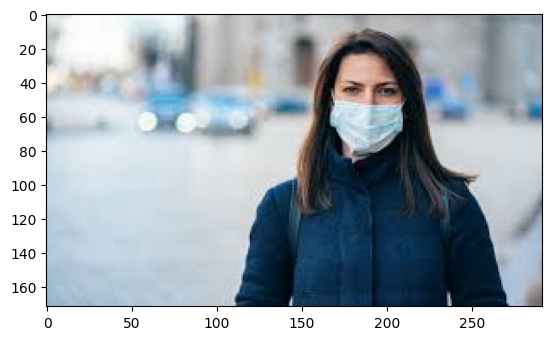

In [22]:
image = cv2.imread('mask2.jpeg')
resize = tf.image.resize(image, (256,256))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:

yhat = model.predict(np.expand_dims((resize/255), 0))

1/1 [==============================] - 0s 77ms/step


In [24]:
yhat

array([[0.6855551]], dtype=float32)